In [1]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import ELU
from keras.preprocessing.image import ImageDataGenerator
import os
print('we are ready boss !!!')

Using TensorFlow backend.


we are ready boss !!!


# configuration of my GPU

In [2]:
#configuration of my GPU
import tensorflow as tf
from keras import backend as kbend
config = tf.ConfigProto()
config.gpu_options.allow_growth = False
config.gpu_options.per_process_gpu_memory_fraction = 0.9
kbend.tensorflow_backend.set_session(tf.Session(config = config))

# Images explorations 

In [2]:
# Get filenames in list
from os import listdir
from os.path import isfile, join
import numpy as np
import cv2
mypath = "./fer2013/train/"
classes = listdir(mypath) #each classes in the training dataset
classes

['Angry', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

In [3]:
train_class0 = [f for f in listdir(join(mypath,classes[0])) if isfile(join(mypath,classes[0],f))]
train_class1 = [f for f in listdir(join(mypath,classes[1])) if isfile(join(mypath,classes[1],f))]
train_class2 = [f for f in listdir(join(mypath,classes[2])) if isfile(join(mypath,classes[2],f))]
train_class3 = [f for f in listdir(join(mypath,classes[3])) if isfile(join(mypath,classes[3],f))]
train_class4 = [f for f in listdir(join(mypath,classes[4])) if isfile(join(mypath,classes[4],f))]
train_class5 = [f for f in listdir(join(mypath,classes[5])) if isfile(join(mypath,classes[5],f))]
classes_list = [train_class0,train_class1,train_class2,train_class3,train_class4,train_class5]
for i,k in enumerate(classes_list):
    print(str(len(k)) + ' images loaded from class ' + str(i) + ' = '+classes[i])
    #converting each classes into an array 
    classes_list[i] = np.array(classes_list[i])

3995 images loaded from class 0 = Angry
4097 images loaded from class 1 = Fear
7215 images loaded from class 2 = Happy
4965 images loaded from class 3 = Neutral
4830 images loaded from class 4 = Sad
3171 images loaded from class 5 = Surprise


image shape : (48, 48)


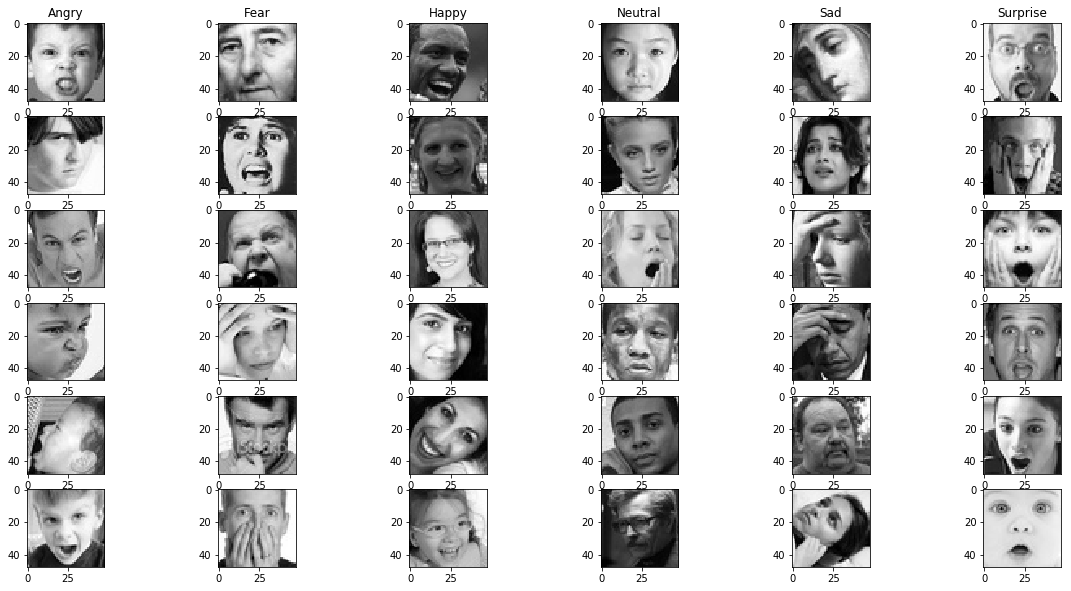

In [5]:
# load and display an image with Matplotlib
import matplotlib.pyplot as plt
from matplotlib import image
images_list = []
count = 0
for i in range(1,37):
    random_num = np.random.randint(0, len(classes_list[count]))
    images_list.append(image.imread(join(mypath,classes[count],classes_list[count][random_num]))) # load image as pixel array
    count +=1
    if (count==len(classes_list)):
        count = 0 
        

print(f'image shape : {images_list[0].shape}')

plt.figure(figsize=(20,10))
columns = 6
for i, img in enumerate(images_list):
    if (i<columns):#simply applying title to each column
        title = classes[i]
        plt.subplot(len(images_list) / columns , columns, i + 1,title =title)
        plt.imshow(img,cmap='gray')
    else: #without title
        plt.subplot(len(images_list) / columns , columns, i + 1)
        plt.imshow(img,cmap='gray')

### from the display above,some images in  Fear and surprise classes seems to have similar expression

# Data augmentation to avoid overfitting 

In [6]:
num_classes = 6
img_rows, img_cols = 48, 48
batch_size = 16

train_data_dir = './fer2013/train'
validation_data_dir = './fer2013/validation'

#instance of the ImageDataGenerator for the train with instatiated parameters 
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      shear_range=0.3,
      zoom_range=0.3,
      width_shift_range=0.4,
      height_shift_range=0.4,
      horizontal_flip=True,
      fill_mode='nearest')

#instance of the ImageDataGenerator for the Validation with instatiated parameters  
validation_datagen = ImageDataGenerator(rescale=1./255)

#the main generator 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)
#the main generator
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

Found 28273 images belonging to 6 classes.
Found 3534 images belonging to 6 classes.


# Model architecture

In [7]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = 'same', kernel_initializer="he_normal",
                 input_shape = (img_rows, img_cols, 1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding = "same", kernel_initializer="he_normal", 
                 input_shape = (img_rows, img_cols, 1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block #2: second CONV => RELU => CONV => RELU => POOL
# layer set
model.add(Conv2D(64, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block #3: third CONV => RELU => CONV => RELU => POOL
# layer set
model.add(Conv2D(128, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block #4: third CONV => RELU => CONV => RELU => POOL
# layer set
model.add(Conv2D(256, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block #5: first set of FC => RELU layers
model.add(Flatten())
model.add(Dense(64, kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block #6: second set of FC => RELU layers
model.add(Dense(64, kernel_initializer="he_normal"))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block #7: softmax classifier
model.add(Dense(num_classes, kernel_initializer="he_normal"))
model.add(Activation("softmax"))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
__________

# Training Model

In [8]:
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

                     
checkpoint = ModelCheckpoint("saved_model/emotion_little_vgg_3.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, verbose = 1, min_delta = 0.0001)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]

# We use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics = ['accuracy'])

nb_train_samples = 28273
nb_validation_samples = 3534
epochs = 10

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/10


InvalidArgumentError: Input to reshape is a tensor with 16 values, but the requested shape has 0
	 [[{{node training/Adam/gradients/loss/activation_11_loss/Sum_1_grad/Reshape}} = Reshape[T=DT_FLOAT, Tshape=DT_INT32, _class=["loc:@training/Adam/gradients/loss/activation_11_loss/Sum_1_grad/Tile"], _device="/job:localhost/replica:0/task:0/device:GPU:0"](training/Adam/gradients/loss/activation_11_loss/Neg_grad/Neg, training/Adam/gradients/loss/activation_11_loss/Sum_1_grad/DynamicStitch/_541)]]

In [ ]:
Epoch 00010: val_loss did not improve from 1.42403